<a href="https://colab.research.google.com/github/karthikmax/MovieLens-EDA/blob/main/MovieLens_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import Libraries

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#set current working directory to where the files are
os.chdir('\Projects\Project 1 - MovieLens')

### Importing Data

In [ ]:
#lets read rating data into a data frame
rating = pd.read_csv('Data.csv')
rating.head()

,user id,movie id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [ ]:
#lets read movies data into a data frame
movies = pd.read_csv('item.csv')
movies.head()

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye,01-Jan-1995,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms,01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty,01-Jan-1995,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat,01-Jan-1995,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
#lets read user data into a data frame
user = pd.read_csv('user.csv')
user.head()

,user id,age,gender,occupation,zip code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


### Shape of the data

In [ ]:
#lets get the shape of the data
print("Rating data has {} rows and {} columns\n".format(rating.shape[0],rating.shape[1]))
print("Movies data has {} rows and {} columns\n".format(movies.shape[0],movies.shape[1]))
print("User data has {} rows and {} columns".format(user.shape[0],user.shape[1]))

Rating data has 100000 rows and 4 columns

Movies data has 1681 rows and 22 columns

User data has 943 rows and 5 columns


### Information about the data

In [ ]:
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user id    100000 non-null  int64
 1   movie id   100000 non-null  int64
 2   rating     100000 non-null  int64
 3   timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB


In [ ]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1681 entries, 0 to 1680
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   movie id      1681 non-null   int64 
 1   movie title   1681 non-null   object
 2   release date  1681 non-null   object
 3   unknown       1681 non-null   int64 
 4   Action        1681 non-null   int64 
 5   Adventure     1681 non-null   int64 
 6   Animation     1681 non-null   int64 
 7   Childrens     1681 non-null   int64 
 8   Comedy        1681 non-null   int64 
 9   Crime         1681 non-null   int64 
 10  Documentary   1681 non-null   int64 
 11  Drama         1681 non-null   int64 
 12  Fantasy       1681 non-null   int64 
 13  Film-Noir     1681 non-null   int64 
 14  Horror        1681 non-null   int64 
 15  Musical       1681 non-null   int64 
 16  Mystery       1681 non-null   int64 
 17  Romance       1681 non-null   int64 
 18  Sci-Fi        1681 non-null   int64 
 19  Thrill

In [ ]:
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user id     943 non-null    int64 
 1   age         943 non-null    int64 
 2   gender      943 non-null    object
 3   occupation  943 non-null    object
 4   zip code    943 non-null    object
dtypes: int64(2), object(3)
memory usage: 37.0+ KB


### Let's find missing values

In [ ]:
rating.isnull().sum()

user id      0
movie id     0
rating       0
timestamp    0
dtype: int64

In [ ]:
movies.isnull().sum()

movie id        0
movie title     0
release date    0
unknown         0
Action          0
Adventure       0
Animation       0
Childrens       0
Comedy          0
Crime           0
Documentary     0
Drama           0
Fantasy         0
Film-Noir       0
Horror          0
Musical         0
Mystery         0
Romance         0
Sci-Fi          0
Thriller        0
War             0
Western         0
dtype: int64

In [ ]:
user.isnull().sum()

user id       0
age           0
gender        0
occupation    0
zip code      0
dtype: int64

There seem to be no missing values in the datasets. 

### Summary of the data 

In [ ]:
rating.describe()

,user id,movie id,rating,timestamp
count,100000.00000,100000.000000,100000.000000,1.000000e+05
mean,462.48475,425.530130,3.529860,8.835289e+08
std,266.61442,330.798356,1.125674,5.343856e+06
min,1.00000,1.000000,1.000000,8.747247e+08
25%,254.00000,175.000000,3.000000,8.794487e+08
50%,447.00000,322.000000,4.000000,8.828269e+08
75%,682.00000,631.000000,4.000000,8.882600e+08
max,943.00000,1682.000000,5.000000,8.932866e+08


In [ ]:
movies.describe()

,movie id,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
count,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000
mean,841.841761,0.000595,0.149316,0.080309,0.024985,0.072576,0.300416,0.064842,0.029744,0.431291,0.013087,0.014277,0.054729,0.033314,0.036288,0.146936,0.060083,0.149316,0.042237,0.016062
std,485.638077,0.024390,0.356506,0.271852,0.156126,0.259516,0.458576,0.246321,0.169931,0.495404,0.113683,0.118667,0.227519,0.179507,0.187061,0.354148,0.237712,0.356506,0.201189,0.125751
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,422.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,842.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1262.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1682.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
user.describe()

,user id,age
count,943.000000,943.000000
mean,472.000000,34.051962
std,272.364951,12.192740
min,1.000000,7.000000
25%,236.500000,25.000000
50%,472.000000,31.000000
75%,707.500000,43.000000
max,943.000000,73.000000


### Find the number of movies per genre using the item (movies) data

In [ ]:
movies.head()

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye,01-Jan-1995,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms,01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty,01-Jan-1995,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat,01-Jan-1995,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
genre_dict = dict()
for i in movies.columns:
    if min(movies[i]) == 0 and max(movies[i]) == 1:
        genre_dict[i] = movies[i].sum() 
        #print("{} - {}".format(i, movies[i].sum()))

genre_list = []
for a,b in genre_dict.items():
    genre_list.append([a,b])

genre_names = list(genre_dict.keys())
    
genre_df = pd.DataFrame(genre_list,columns = ['Genre','Count'])
genre_df = genre_df.sort_values(['Count'],ascending = False).reset_index(drop = True)
genre_df

,Genre,Count
0,Drama,725
1,Comedy,505
2,Action,251
3,Thriller,251
4,Romance,247
5,Adventure,135
6,Childrens,122
7,Crime,109
8,Sci-Fi,101
9,Horror,92


<b>
    Most Popular Genre  : Drama <br>
    Least Popular Genre : Fantasy
</b>

However, a movie can have multiple genres. The count is not unique count of movies by genre. 

### Drop the movie where the genre is unknown

In [ ]:
#using drop method on the dataframe to drop a column. Use axis = 1 to specify we are dropping column
movies.drop(labels=['unknown'],axis = 1,inplace = True)

In [ ]:
movies.head()

,movie id,movie title,release date,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,01-Jan-1995,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye,01-Jan-1995,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms,01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty,01-Jan-1995,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat,01-Jan-1995,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


### Find the movies that have more than one genre

In [ ]:
#movies_array = np.array(movies.drop(labels = ['movie id','release date'],axis = 1))
#check to see if TotalGenres column is already created. if so drop the column
if 'TotalGenres' in movies.columns:
    movies.drop(labels = ['TotalGenres'],axis = 1,inplace = True)

#create a column TotalGenres with the sum of genres each movie is classified with
movies['TotalGenres'] = movies.iloc[:,3:].sum(axis = 1)

#create a new dataframe with just movie title and TotalGenres
TotalGenres = pd.DataFrame(movies[['movie title','TotalGenres']])
TotalGenres.head()

,movie title,TotalGenres
0,Toy Story,3
1,GoldenEye,3
2,Four Rooms,1
3,Get Shorty,3
4,Copycat,3


In [ ]:
#Find all movies that has more than 1 genre assigned and get its count
TotalGenres[TotalGenres['TotalGenres'] > 1]['TotalGenres'].count()

849

There are 849 movies than have more than one genre

### Univariate plots of columns: 'rating', 'Age', 'release year', 'Gender' and 'Occupation'

In [ ]:
#lets join all data together
#user.join(rating,on='user id',how='left',rsuffix='_rating').join(movies, on='movie id')

#first step is to join rating data with user data on the common column 'user id'
data = pd.merge(user,rating,on='user id')

In [ ]:
#join movies data with data created above on the common column 'movie id'
data = pd.merge(data,movies,on='movie id')

In [ ]:
#create year column by converting to pandas datetime object and extracting year from it
data['releaseYear'] = pd.to_datetime(data['release date']).dt.year

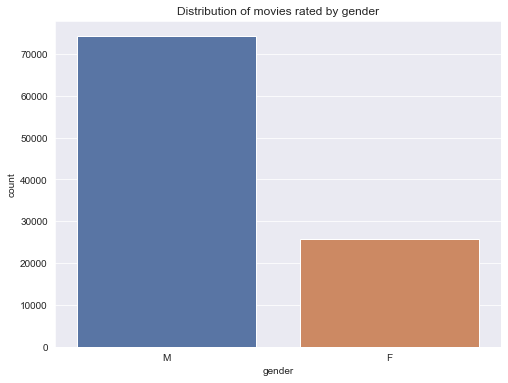

In [ ]:
sns.set({'figure.figsize': (8,6)})
sns.countplot(data['gender'])
plt.title("Distribution of movies rated by gender")
plt.show()

About 26000 women have watched and rated movies as compared to 75000 men. That is almost 3 times men watch movies than women

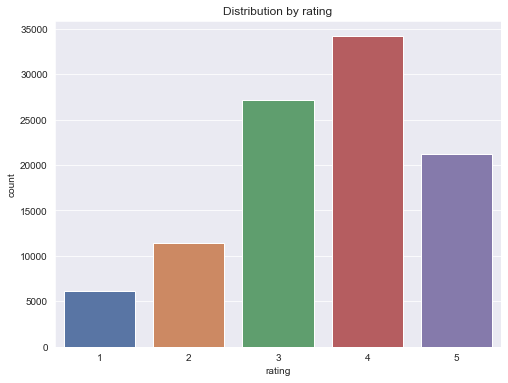

In [ ]:
sns.set({'figure.figsize': (8,6)})
sns.countplot(data['rating'])
plt.title("Distribution by rating")
plt.show()

Most rating given is 4 with a total of 34000 users. Followed by 3 rated by 27000 users. 

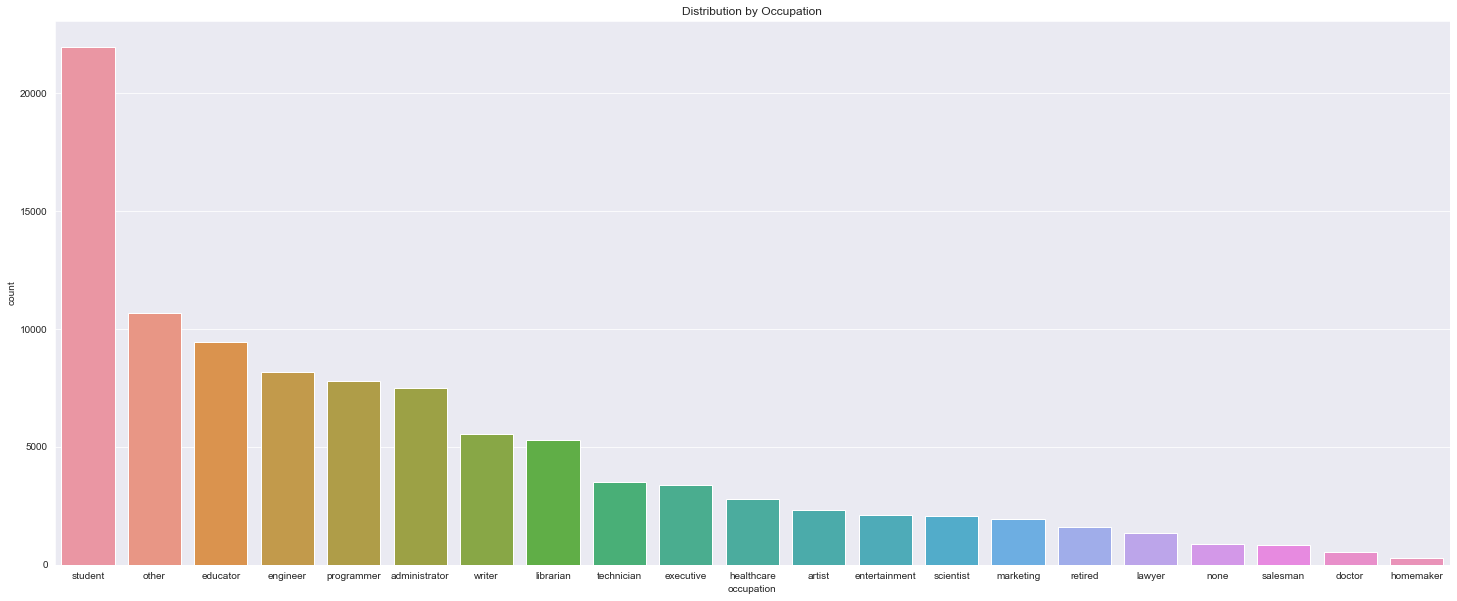

In [ ]:
sns.set({'figure.figsize': (25,10)})
sns.countplot(data['occupation'],
             order=data['occupation'].value_counts().index)
plt.title("Distribution by Occupation")
plt.show()

Seems students are the ones who have rated most. 

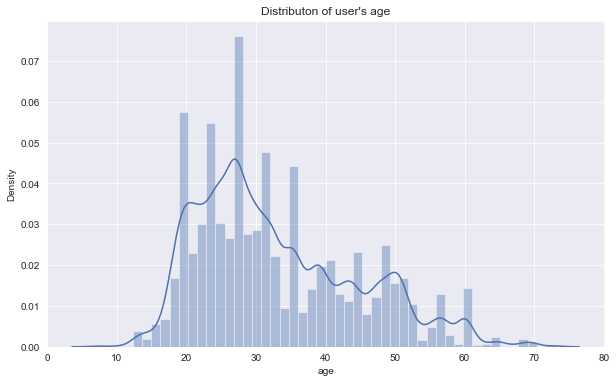

In [ ]:
sns.set({'figure.figsize':(10,6)})
sns.distplot(data['age'])
plt.title("Distributon of user's age")
plt.show()

Looks like age is positively skewed. Ages between 20-35 are the ones who watch most movies among the population

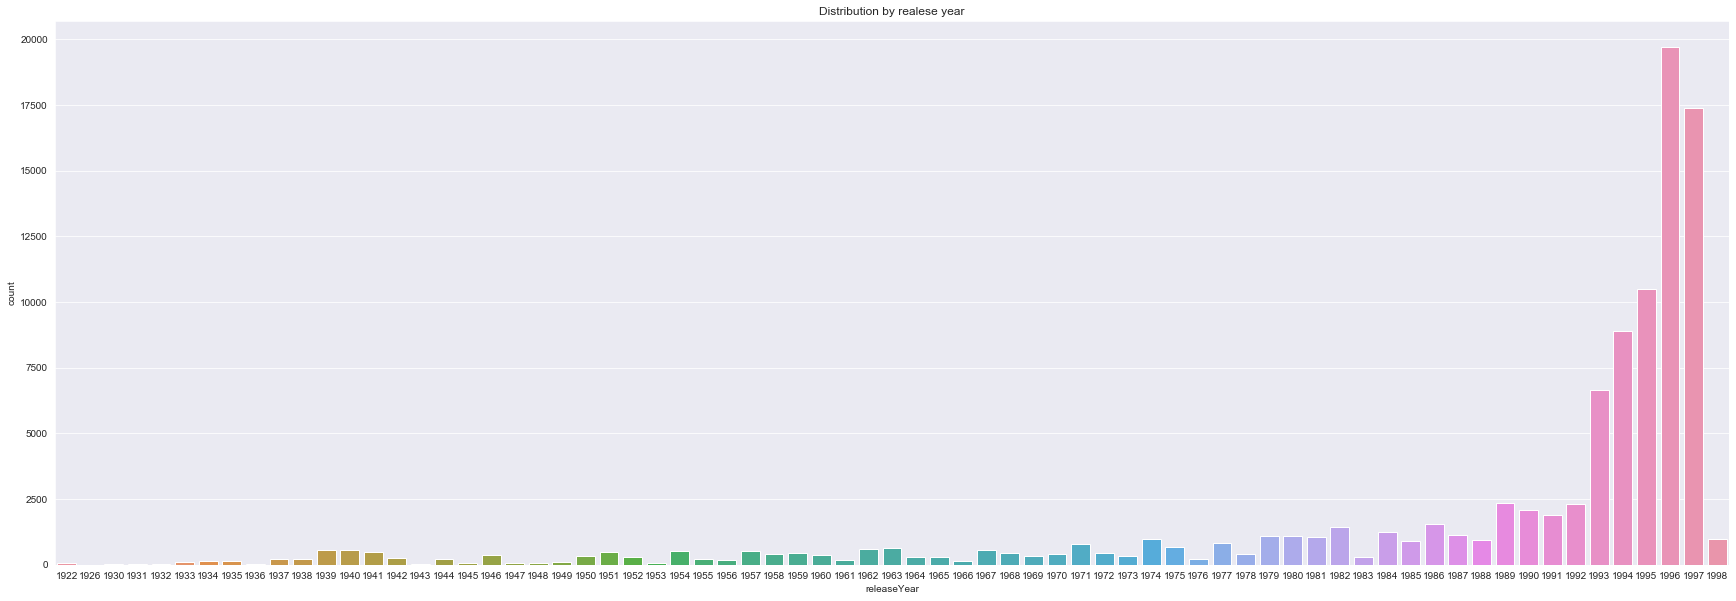

In [ ]:
sns.set({'figure.figsize':(30,10)})
sns.countplot(data['releaseYear'])
plt.title("Distribution by realese year")
plt.show()

Most movie rated were released in 1996 and 1997. 

In [ ]:
#sum the data by release year
genre_byYear = data.groupby('releaseYear').sum()

In [ ]:
#drop columns that are not necessary
genre_byYear = genre_byYear.drop(columns=['user id','age','movie id','rating','timestamp','TotalGenres'])

In [ ]:
#Transpose the data
genre_byYear = genre_byYear.T

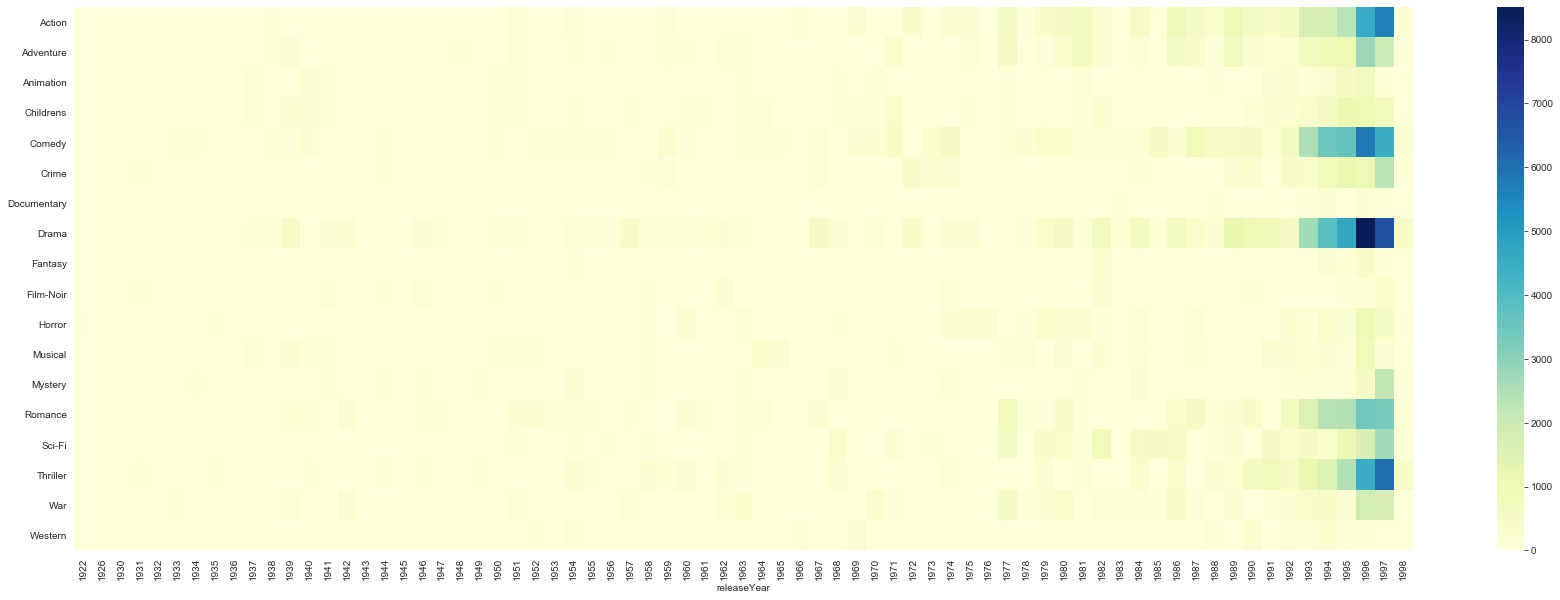

In [ ]:
sns.heatmap(genre_byYear,cmap="YlGnBu")
plt.show()

Drama, Comedy and Action movies released between 1994 and 1997 seems to be the most watched. Followed closely by Thriller and Romance.

### Top 25 movies in terms of average ratings for movies that have been rated more than 100 times

In [ ]:
data['movie title'].value_counts()[:25]

Star Wars                              583
Contact                                509
Fargo                                  508
Return of the Jedi                     507
Liar Liar                              485
English Patient, The                   481
Scream                                 478
Toy Story                              452
Air Force One                          431
Independence Day (ID4)                 429
Raiders of the Lost Ark                420
Godfather, The                         413
Pulp Fiction                           394
Twelve Monkeys                         392
Silence of the Lambs, The              390
Jerry Maguire                          384
Chasing Amy                            379
Rock, The                              378
Empire Strikes Back, The               367
Star Trek: First Contact               365
Titanic                                350
Back to the Future                     350
Mission: Impossible                    344
Fugitive, T

In [ ]:
#create a dataframe to get size and mean by each movie. size means number of people who have rated it
#use agg method to club size and mean together in one table
movie_stats = data.groupby('movie title').agg({'rating':[np.size,np.mean]})

In [ ]:
movie_stats

rating          
                                  size      mean
movie title                                     
'Til There Was You                   9  2.333333
1-900                                5  2.600000
101 Dalmatians                     109  2.908257
12 Angry Men                       125  4.344000
187                                 41  3.024390
...                                ...       ...
Young Guns                         101  3.207921
Young Guns II                       44  2.772727
Young Poisoner's Handbook, The      41  3.341463
Zeus and Roxanne                     6  2.166667
Á köldum klaka (Cold Fever)          1  3.000000

[1658 rows x 2 columns]

In [ ]:
#sort by rating and mean 
movie_stats.sort_values([('rating','mean')],ascending=False).head()

rating     
                                              size mean
movie title                                            
Great Day in Harlem, A                           1  5.0
Prefontaine                                      3  5.0
Someone Else's America                           1  5.0
Marlene Dietrich: Shadow and Light (             1  5.0
Entertaining Angels: The Dorothy Day Story       1  5.0

Some movies have higher mean mainly because very less people have rated it.

In [ ]:
#find all movies with size greater than 100
movies_100ormore = movie_stats['rating']['size'] >= 100
#filter out movies that have 100 or more ratings and order by size and mean and pick the top 25
movie_stats[movies_100ormore].sort_values([('rating','mean')],ascending=False)[:25]

rating          
                                                     size      mean
movie title                                                        
Close Shave, A                                        112  4.491071
Schindler's List                                      298  4.466443
Wrong Trousers, The                                   118  4.466102
Casablanca                                            243  4.456790
Shawshank Redemption, The                             283  4.445230
Rear Window                                           209  4.387560
Usual Suspects, The                                   267  4.385768
Star Wars                                             583  4.358491
12 Angry Men                                          125  4.344000
Citizen Kane                                          198  4.292929
To Kill a Mockingbird                                 219  4.292237
One Flew Over the Cuckoo's Nest                       264  4.291667
Silence of the Lambs, The                             390  4.289744
North by Northwest                                    179  4.284916
Godfather, The                                        413  4.283293
Secrets & Lies                                        162  4.265432
Good Will Hunting                                     198  4.262626
Manchurian Candidate, The                             131  4.259542
Dr. Strangelove or: How I Learned to Stop Worry...    194  4.252577
Raiders of the Lost Ark                               420  4.252381
Vertigo                                               179  4.251397
Titanic                                               350  4.245714
Lawrence of Arabia                                    173  4.231214
Maltese Falcon, The                                   138  4.210145
Empire Strikes Back, The                              367  4.204360

Most number of people have rated 'Star Wars' but 'A Close Shave' has a higher average rating.

### Comparison of genre preferences between women and men 

In [ ]:
#lets create a new dataframe to get the sum of all genres by gender
#genre_byGender = data.groupby("gender").sum().loc[:,'Action':'Western']
genre_byGender = data.groupby("gender").sum()

In [ ]:
#Take a look at the dataframe from previous step
genre_byGender

,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
gender,,,,,,,,,,,,,,,,,,
F,5442,3141,995,2232,8068,1794,187,11008,363,385,1197,1442,1314,5858,2629,5086,2189,371
M,20147,10612,2610,4950,21764,6261,571,28887,989,1348,4120,3512,3931,13603,10101,16786,7209,1483


<b>Summary by absolute numbers</b> <br>
- Men watch more drama than women   : Yes. About 17000 more men watch drama than women. 
- Women watch more Sci-Fi than men  : No. Only 2629 women watch Sci-Fi as compared to 10101 men who watch Sci-Fi
- Men watch more Romance than women : Yes. 13603 men watch romance as against 5858 women who watch romance

In [ ]:
#Lets calculate genre by gender in percentage terms

#create a new column 'Total' that sums up all the genres watched by women and men. Basically a row total
genre_byGender['Total'] = genre_byGender.sum(axis = 1)

In [ ]:
#Use div() to divide each entry by the row total we calcuated above. multiply by 100 to get percentage
#round down the values to one decimal point precision
round(genre_byGender.div(genre_byGender['Total'],axis = 0) * 100,1)

,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,Total
gender,,,,,,,,,,,,,,,,,,,
F,10.1,5.8,1.9,4.2,15.0,3.3,0.3,20.5,0.7,0.7,2.2,2.7,2.4,10.9,4.9,9.5,4.1,0.7,100.0
M,12.7,6.7,1.6,3.1,13.7,3.9,0.4,18.2,0.6,0.8,2.6,2.2,2.5,8.6,6.4,10.6,4.5,0.9,100.0


<b>Summary by percentages </b><br>
- Men watch more drama than women  : No. 20% of all women watch drama as compared to 18% of men
- Women watch more Sci-Fi than men : No. 6% of all men watch Sci-Fi against ~5% of all women
- Men watch more Romance than women : No. About 11% of all women watch romance vs 8.6% of all men who watch romance
